## 29/01/2023

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [2]:
plt.style.use(style="ggplot")

In [3]:
print("numpy version: ", np.__version__)
print("sklearn version: ", sklearn.__version__)
print("matplotlib version: ", matplotlib.__version__)


# numpy version:  1.24.1
# sklearn version:  1.2.0
# matplotlib version:  3.6.3

numpy version:  1.24.1
sklearn version:  1.2.0
matplotlib version:  3.6.3


Doc: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [4]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=15)

In [5]:
X

array([[ 0.35523945, -0.11697552],
       [-0.09282829, -0.73115232],
       [-0.1984984 , -0.7081059 ],
       [-2.44001098, -2.01199214],
       [-0.0448475 ,  1.63493163],
       [-1.68155714,  0.15599044],
       [-2.64121606,  1.07782053],
       [ 0.2416527 ,  0.80626713],
       [-0.40266099,  0.74859527],
       [-2.80888854,  0.75152794],
       [-2.62743539, -0.90114581],
       [-2.62900445, -0.1815243 ],
       [ 0.13405049, -2.98092432],
       [ 0.96162631,  1.20500136],
       [-2.67615806,  0.78302407],
       [ 0.54329928,  0.42968688],
       [ 0.01490532, -0.73229726],
       [-2.72870533, -0.83930476],
       [-0.02633711,  0.83727062],
       [-2.61974125, -0.10255323],
       [-3.1257262 ,  0.65867001],
       [-2.91434094,  0.92649819],
       [-2.16605143,  0.10216193],
       [ 1.76642459,  0.46886454],
       [-2.06564986,  0.45432938],
       [ 0.7699643 ,  1.8613386 ],
       [-2.63675549, -0.79255991],
       [-1.89063753, -1.0004391 ],
       [-3.24982176,

In [6]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

# Simple Logistic Regression

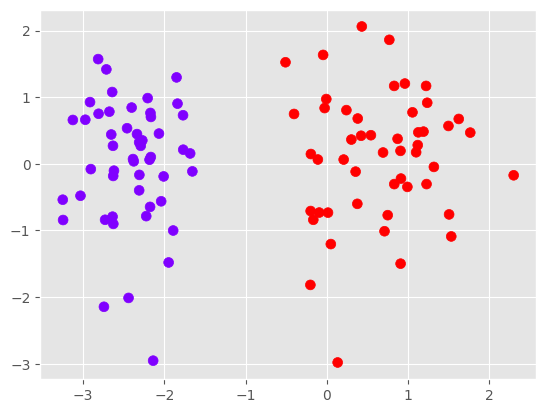

In [7]:
# Let's plot it

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap="rainbow", s=50)
plt.show()

In [8]:
# Demo test
np.insert(arr=X, obj=0, values=1, axis=1)[:10]

array([[ 1.        ,  0.35523945, -0.11697552],
       [ 1.        , -0.09282829, -0.73115232],
       [ 1.        , -0.1984984 , -0.7081059 ],
       [ 1.        , -2.44001098, -2.01199214],
       [ 1.        , -0.0448475 ,  1.63493163],
       [ 1.        , -1.68155714,  0.15599044],
       [ 1.        , -2.64121606,  1.07782053],
       [ 1.        ,  0.2416527 ,  0.80626713],
       [ 1.        , -0.40266099,  0.74859527],
       [ 1.        , -2.80888854,  0.75152794]])

In [9]:
# demo test

np.random.randint(low=0, high=X.shape[0])

16

In [10]:
# demo test
np.ones(X.shape[1])

array([1., 1.])

In [11]:
# Let's make a class

class PerceptronTrick:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.intercept_ = None
        self.coef_ = None
        
        
    def fit(self, X, y):
        X = np.insert(arr=X, obj=0, values=1, axis=1)
        self.weights = np.ones(X.shape[1])
        
        for i in range(self.epochs):
            index_value = np.random.randint(low=0, high=X.shape[0])
            
            y_hat = self.__step_fun(np.dot(a=X[index_value], b=self.weights))
            
            self.weights = self.weights + self.lr * (y[index_value] - y_hat) * X[index_value]
            
        self.intercept_, self.coef_ = self.weights[0], self.weights[1:]
    
    def __step_fun(self, z):
        return 1 if z > 0 else 0


In [12]:
obj = PerceptronTrick(learning_rate=0.1, epochs=1000)

obj.fit(X, y)

In [13]:
obj.intercept_

1.2000000000000002

In [14]:
obj.coef_

array([1.15796462, 0.20882663])

In [15]:
m = -(obj.coef_[0] / obj.coef_[1])
b = -(obj.intercept_ / obj.coef_[1])

print(m)
print(b)

-5.545100454471913
-5.74639367231023


In [16]:
x_input = np.linspace(start=-3, stop=3, num=100)

y_input = m * x_input + b # y = mx + b

In [17]:
y_input

array([ 10.88890769,  10.552841  ,  10.2167743 ,   9.88070761,
         9.54464091,   9.20857422,   8.87250753,   8.53644083,
         8.20037414,   7.86430744,   7.52824075,   7.19217405,
         6.85610736,   6.52004067,   6.18397397,   5.84790728,
         5.51184058,   5.17577389,   4.8397072 ,   4.5036405 ,
         4.16757381,   3.83150711,   3.49544042,   3.15937372,
         2.82330703,   2.48724034,   2.15117364,   1.81510695,
         1.47904025,   1.14297356,   0.80690686,   0.47084017,
         0.13477348,  -0.20129322,  -0.53735991,  -0.87342661,
        -1.2094933 ,  -1.54555999,  -1.88162669,  -2.21769338,
        -2.55376008,  -2.88982677,  -3.22589347,  -3.56196016,
        -3.89802685,  -4.23409355,  -4.57016024,  -4.90622694,
        -5.24229363,  -5.57836033,  -5.91442702,  -6.25049371,
        -6.58656041,  -6.9226271 ,  -7.2586938 ,  -7.59476049,
        -7.93082718,  -8.26689388,  -8.60296057,  -8.93902727,
        -9.27509396,  -9.61116066,  -9.94722735, -10.28

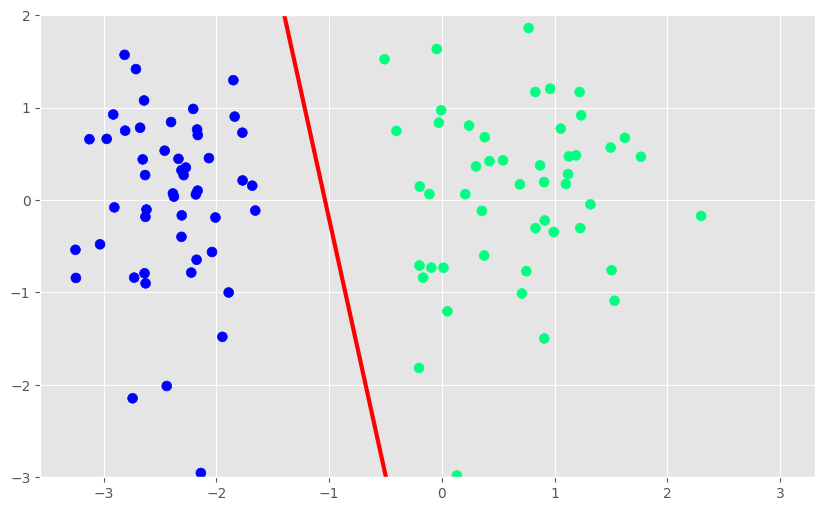

In [18]:
# Let's plot our line

plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='winter', s=50)
plt.ylim(-3,2)
plt.show()

### Make animation

In [19]:
def step(z):
    return 1 if z>0 else 0

In [20]:
def perceptron(X, y):
    
    m = []
    b = []
    
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [21]:
m_value, b_value = perceptron(X,y)

In [22]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


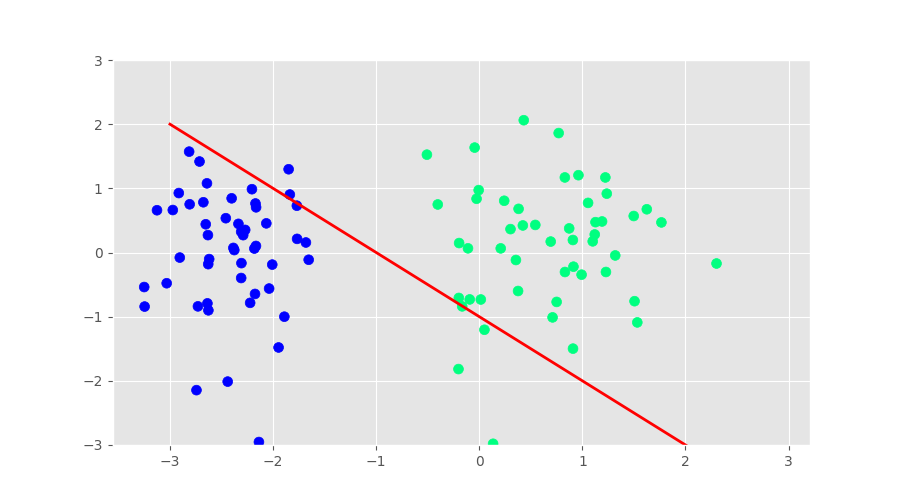

In [23]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)

y_i = x_i * m_value[0] + b_value[0]

ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=50)

line, = ax.plot(x_i, x_i* m_value[0] + b_value[0] , 'r-', linewidth=2)

plt.ylim(-3, 3)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i * m_vale[i] + b_value[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

## Apply Scikit-Learn Logistic Regression

In [24]:
lr_model = LogisticRegression()

In [25]:
lr_model.fit(X=X, y=y)

LogisticRegression()

In [26]:
lr_model.coef_

array([[2.87119932, 0.03099621]])

In [27]:
lr_model.intercept_

array([2.83641872])

In [28]:
m1 = -(lr_model.coef_[0][0] / lr_model.coef_[0][1])

b1 = -(lr_model.intercept_ / lr_model.coef_[0][1])

In [29]:
x_input1 = np.linspace(start=-3, stop=3, num=100)

y_input1 = m1 * x_input + b1

<IPython.core.display.Javascript object>


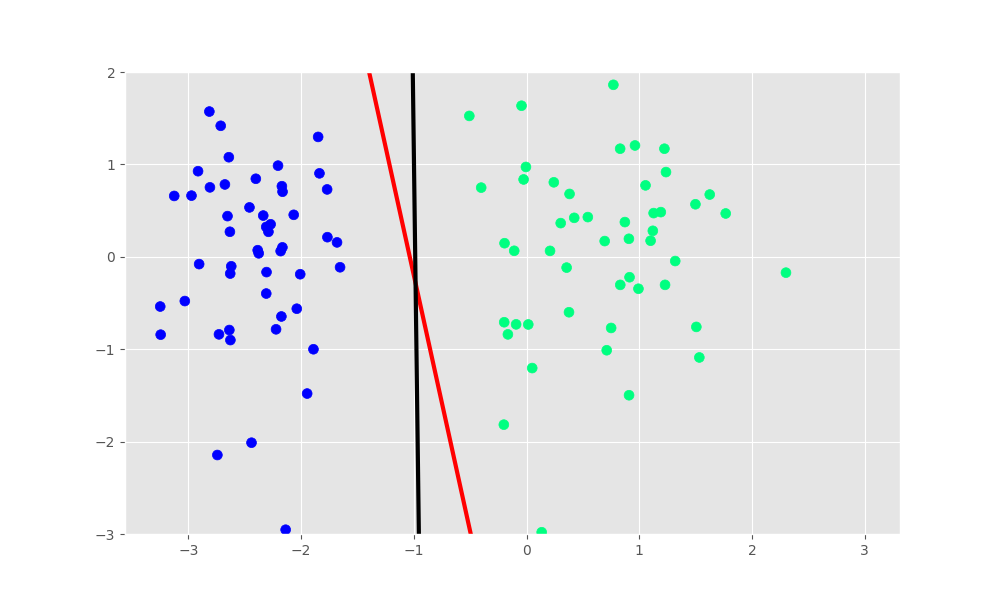

In [30]:
# Let's plot our line

plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input1, y_input1, color='black', linewidth=3)
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='winter', s=50)
plt.ylim(-3,2)
plt.show()

## Use sigmoid function in perceptron trick

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [32]:
# Let's make a class

class PerceptronTrick2:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.intercept_ = None
        self.coef_ = None
        
        
    def fit(self, X, y):
        X = np.insert(arr=X, obj=0, values=1, axis=1)
        self.weights = np.ones(X.shape[1])
        
        for i in range(self.epochs):
            index_value = np.random.randint(low=0, high=X.shape[0])
            
            y_hat = self.__sigmoid(np.dot(a=X[index_value], b=self.weights))
            
            self.weights = self.weights + self.lr * (y[index_value] - y_hat) * X[index_value]
            
        self.intercept_, self.coef_ = self.weights[0], self.weights[1:]
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


In [33]:
model_obj = PerceptronTrick2(learning_rate=0.1, epochs=1000)

model_obj.fit(X, y)

In [34]:
model_obj.coef_

array([ 3.44086022, -0.00780903])

In [35]:
model_obj.intercept_

2.924502735208024

In [36]:
m2 = -(model_obj.coef_[0] / model_obj.coef_[1])
b2 = -(model_obj.intercept_ / model_obj.coef_[1])

print(m2)
print(b2)

440.6257032617097
374.5025928998176


In [37]:
x_input2 = np.linspace(start=-3, stop=3, num=100)

y_input2 = m2 * x_input2 + b2 # y = mx + b

<IPython.core.display.Javascript object>


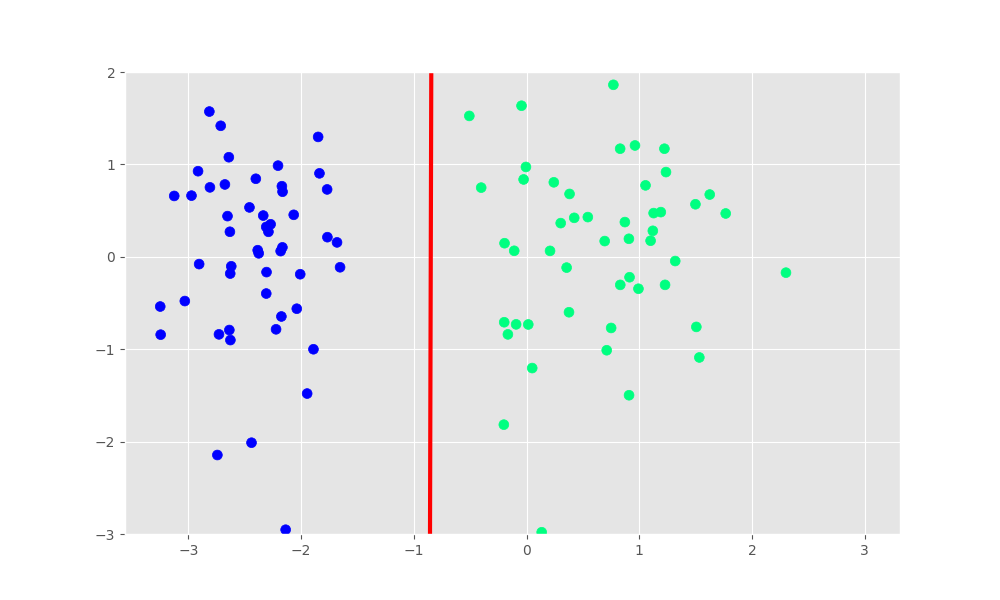

In [38]:
# Let's plot our line

plt.figure(figsize=(10,6))
plt.plot(x_input2, y_input2, color='red', linewidth=3)
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='winter', s=50)
plt.ylim(-3,2)
plt.show()

<IPython.core.display.Javascript object>


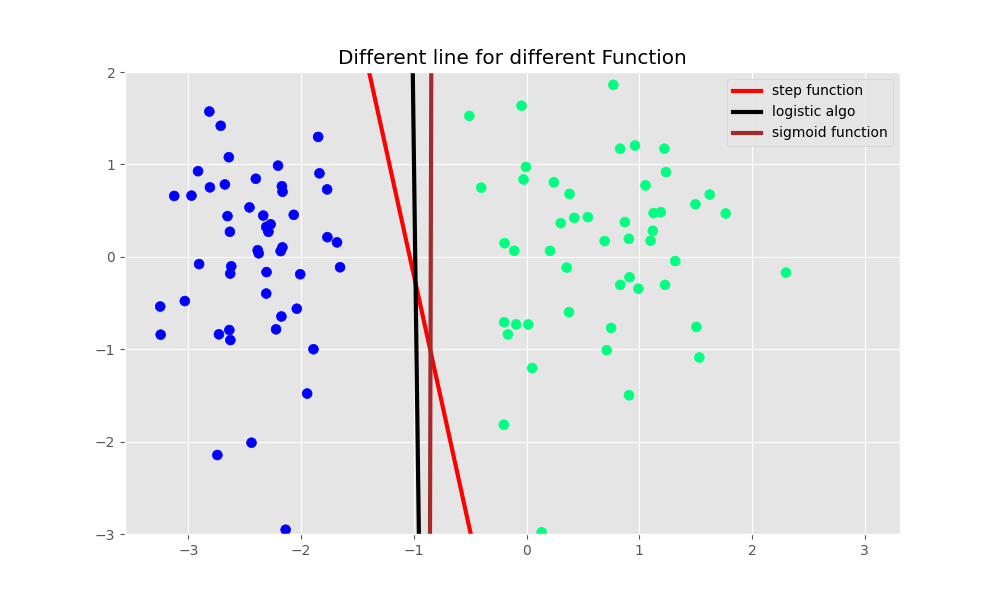

In [42]:
# Let's plot our line

plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3, label="step function")
plt.plot(x_input1, y_input1, color='black', linewidth=3, label="logistic algo")
plt.plot(x_input2, y_input2, color='brown', linewidth=3, label="sigmoid function")
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap='winter', s=50)
plt.ylim(-3,2)
plt.title(label="Different line for different Function")
plt.legend()
plt.show()